<a href="https://colab.research.google.com/github/Basytism/-PORTFOLIO-PROJECT-SET/blob/main/crypto_trading_trend_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install requests plotly pandas


In [2]:
import requests
import pandas as pd
import plotly.graph_objects as go

def fetch_binance_data(symbol='BTCUSDT', interval='1d', limit=90):
    url = f"https://api.binance.com/api/v3/klines?symbol={symbol}&interval={interval}&limit={limit}"
    response = requests.get(url)
    data = response.json()

    df = pd.DataFrame(data, columns=[
        'Open Time', 'Open', 'High', 'Low', 'Close', 'Volume',
        'Close Time', 'Quote Asset Volume', 'Number of Trades',
        'Taker Buy Base Volume', 'Taker Buy Quote Volume', 'Ignore'
    ])

    df['Open Time'] = pd.to_datetime(df['Open Time'], unit='ms')
    df[['Open', 'High', 'Low', 'Close', 'Volume']] = df[['Open', 'High', 'Low', 'Close', 'Volume']].astype(float)
    return df[['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume']]

btc_df = fetch_binance_data('BTCUSDT')
btc_df.head()


,Open Time,Open,High,Low,Close,Volume


In [3]:
fig = go.Figure(data=[go.Candlestick(
    x=btc_df['Open Time'],
    open=btc_df['Open'],
    high=btc_df['High'],
    low=btc_df['Low'],
    close=btc_df['Close']
)])
fig.update_layout(title='📉 BTC/USDT Candlestick (Daily)', xaxis_title='Date', yaxis_title='Price (USDT)')
fig.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



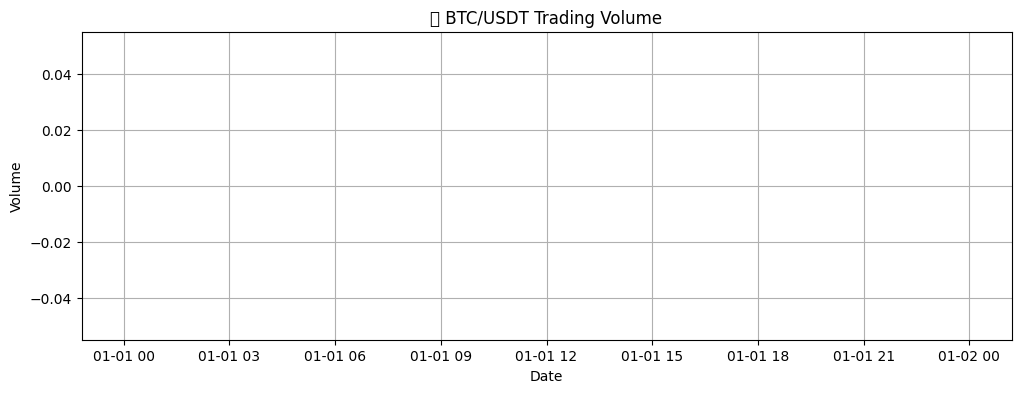

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(btc_df['Open Time'], btc_df['Volume'], color='skyblue')
plt.title('📊 BTC/USDT Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128185 (\N{CHART WITH UPWARDS TREND AND YEN SIGN}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128185 (\N{CHART WITH UPWARDS TREND AND YEN SIGN}) missing from font(s) DejaVu Sans.



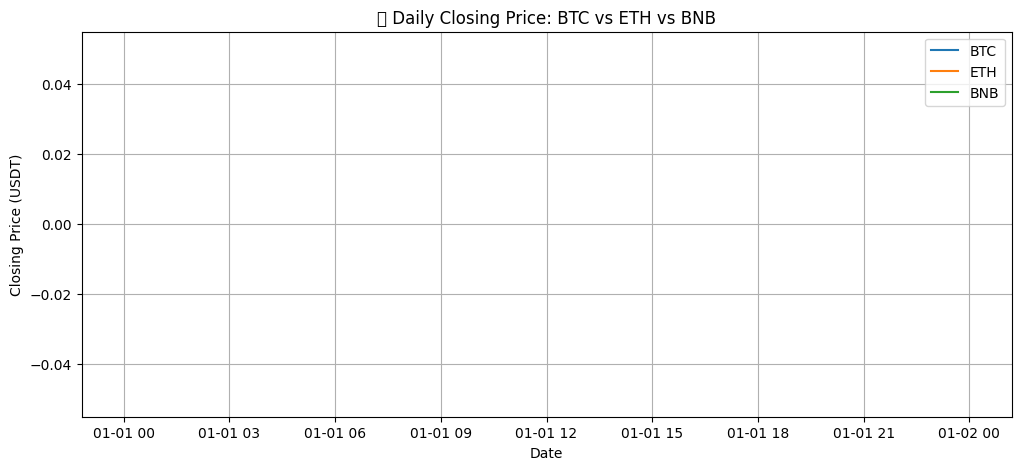

In [5]:
eth_df = fetch_binance_data('ETHUSDT')
bnb_df = fetch_binance_data('BNBUSDT')

# Compare 3 coins side by side in closing prices
plt.figure(figsize=(12, 5))
plt.plot(btc_df['Open Time'], btc_df['Close'], label='BTC')
plt.plot(eth_df['Open Time'], eth_df['Close'], label='ETH')
plt.plot(bnb_df['Open Time'], bnb_df['Close'], label='BNB')
plt.legend()
plt.title("💹 Daily Closing Price: BTC vs ETH vs BNB")
plt.xlabel("Date")
plt.ylabel("Closing Price (USDT)")
plt.grid(True)
plt.show()


**Author: Abdul Basit Noor | Powered by Synergy Spheres 3.0**